In [21]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [7]:
#Fill missing values for income
df['Income'].fillna(df['Income'].median(), inplace=True)

In [8]:
# Convert Dt_Customer to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [9]:
# One-hot encode categorical features
categorical_features = ['Education', 'Marital_Status']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [10]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['ID', 'Dt_Customer']))

In [11]:
# Convert scaled features back to a DataFrame for convenience
scaled_df = pd.DataFrame(scaled_features, columns=df.columns.drop(['ID', 'Dt_Customer']))

In [12]:
# Add the 'ID' and 'Dt_Customer' columns back
scaled_df['ID'] = df['ID'].values
scaled_df['Dt_Customer'] = df['Dt_Customer'].values

In [13]:
scaled_df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,ID,Dt_Customer
0,-0.985345,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,-0.526385,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,5524,2012-09-04
1,-1.235733,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,-0.526385,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,2174,2014-03-08
2,-0.317643,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,-0.526385,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,4141,2013-08-21
3,1.268149,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,-0.526385,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,6182,2014-02-10
4,1.017761,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,1.899751,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,5324,2014-01-19


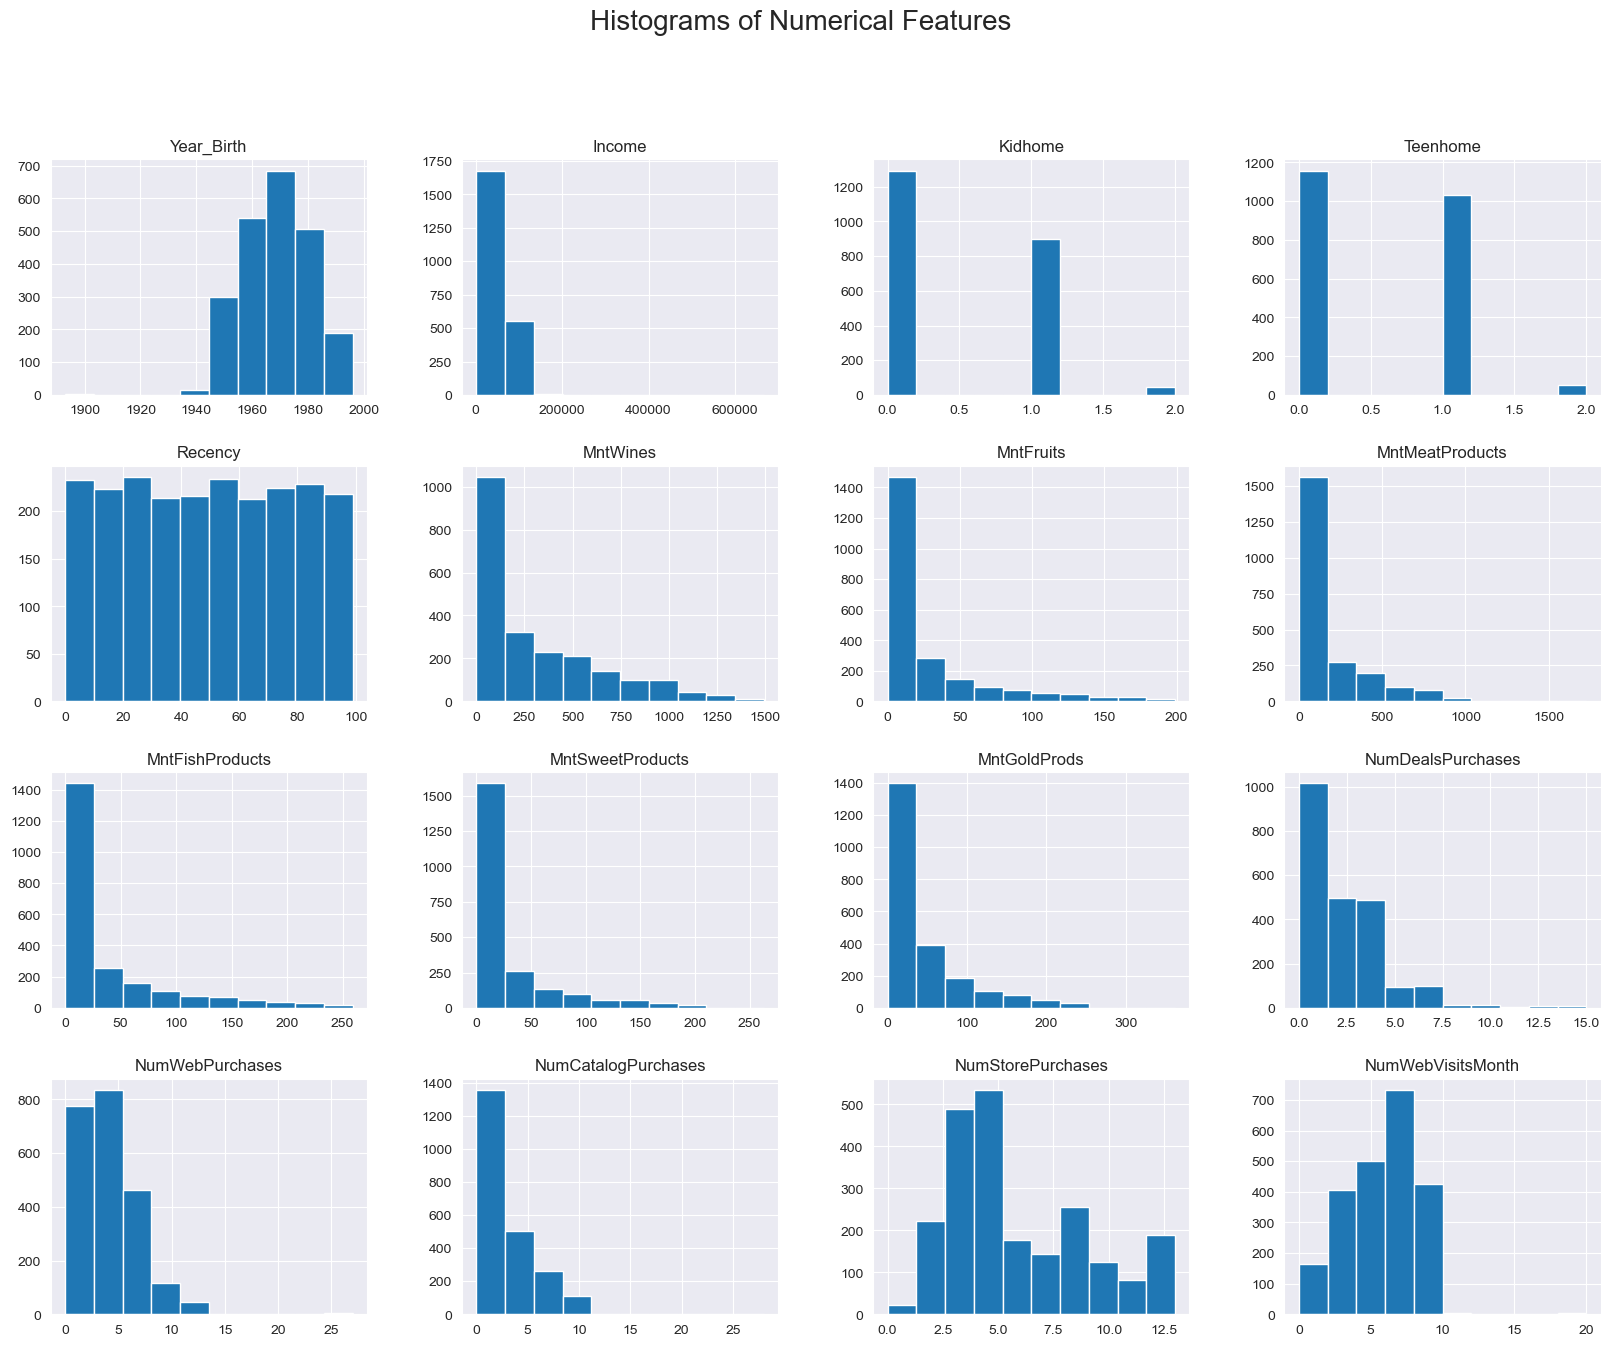

In [14]:
# Histograms for numerical features
numerical_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                      'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                      'NumWebVisitsMonth']

df[numerical_features].hist(figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features', fontsize=20)
plt.show()

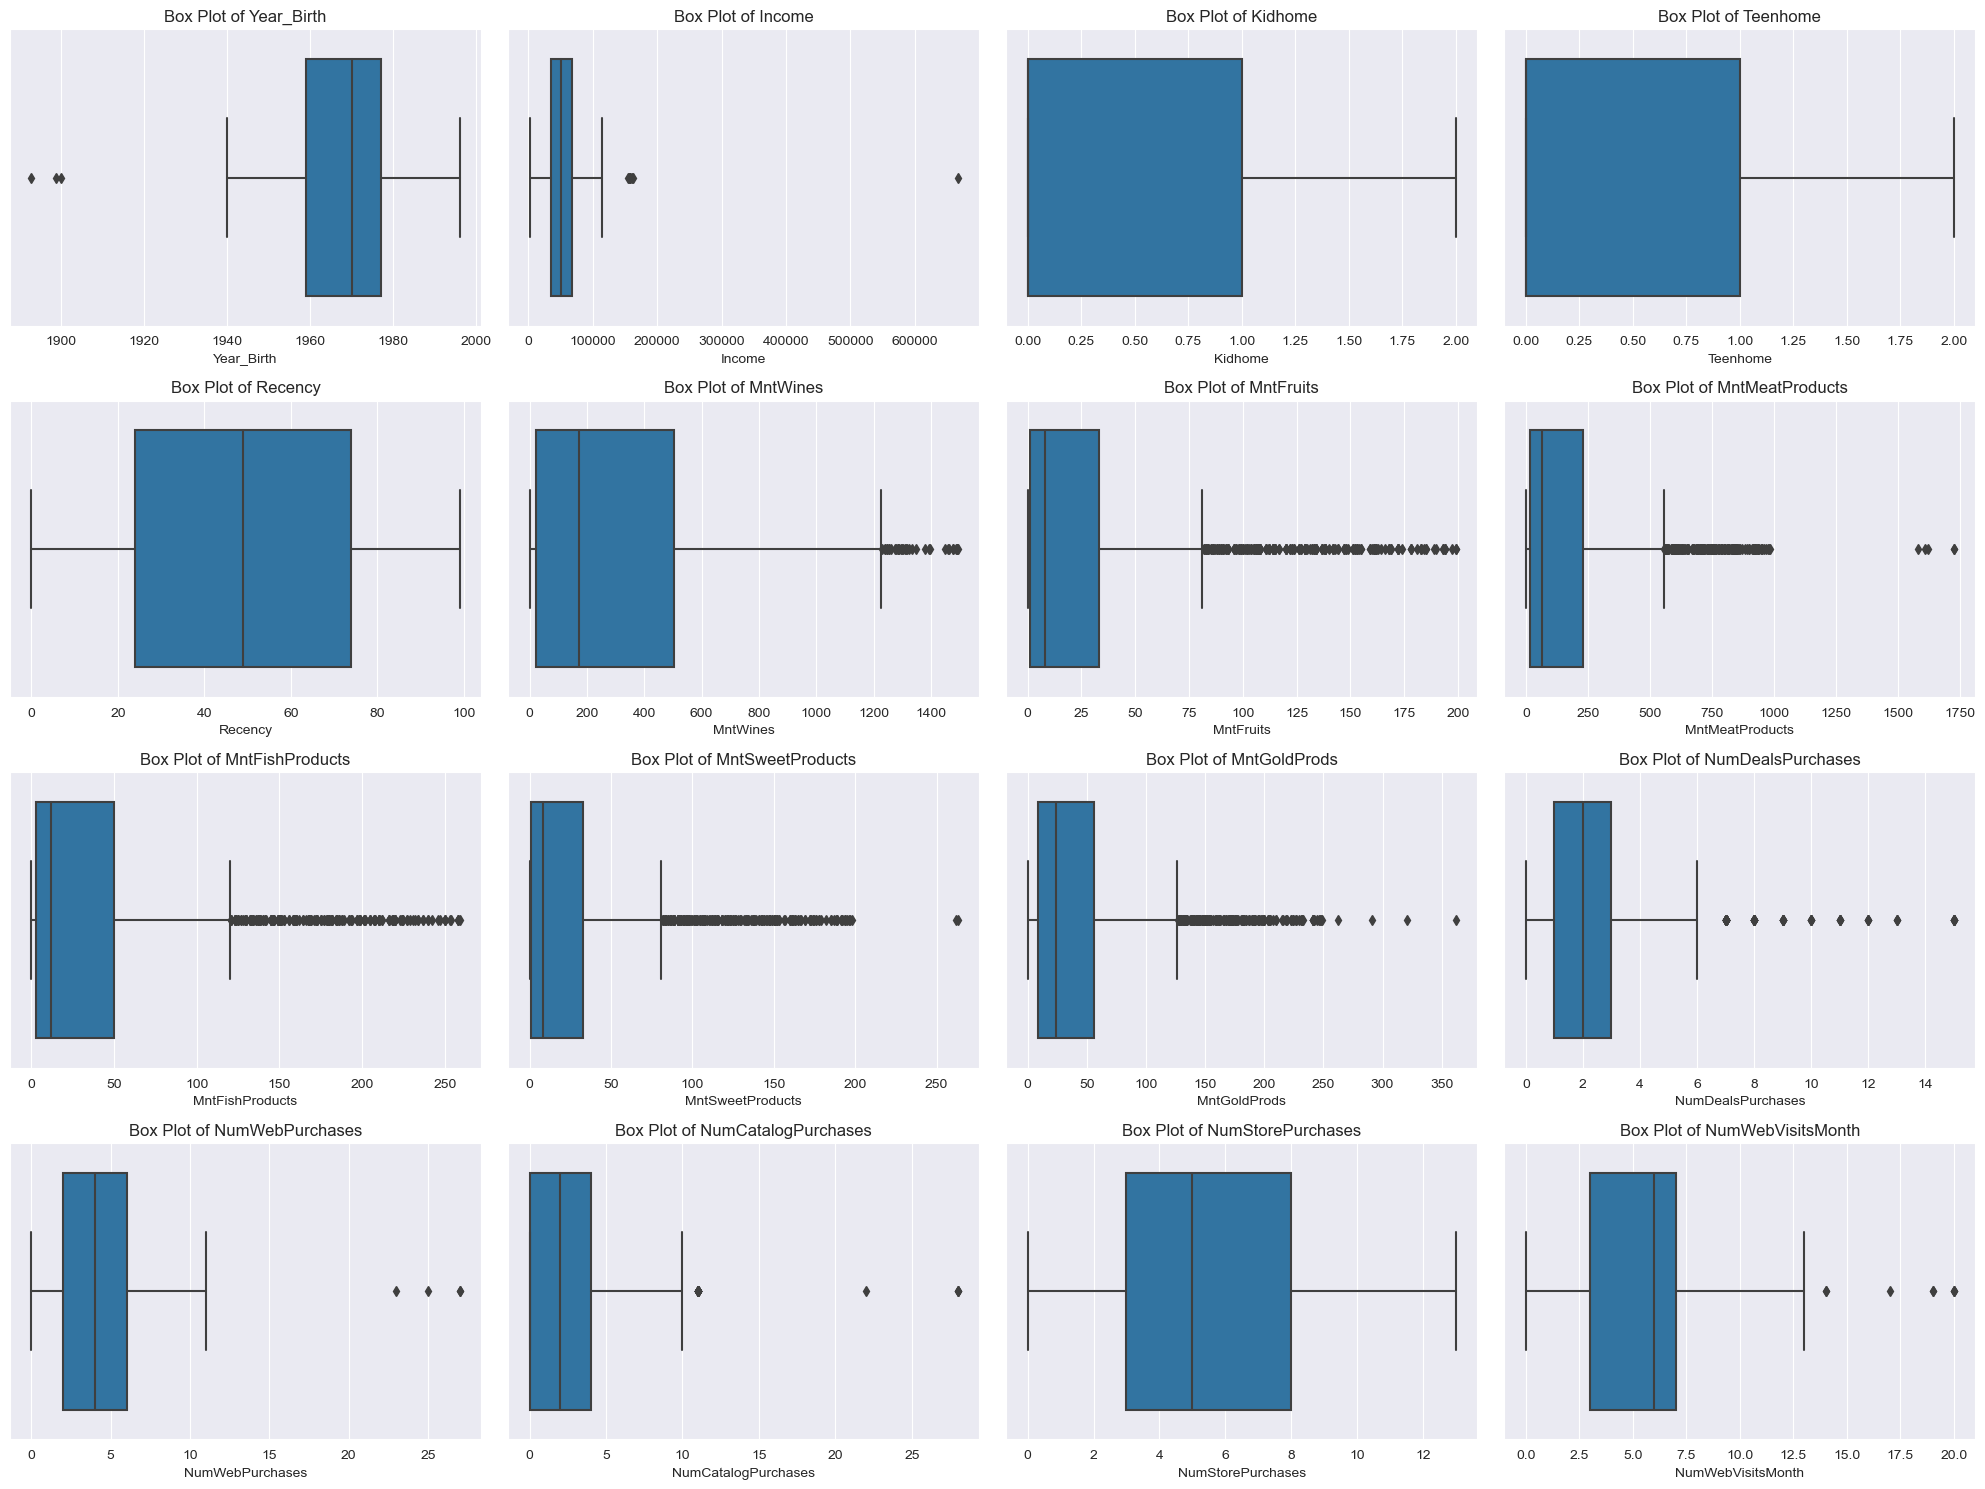

In [15]:
# Box plots for numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

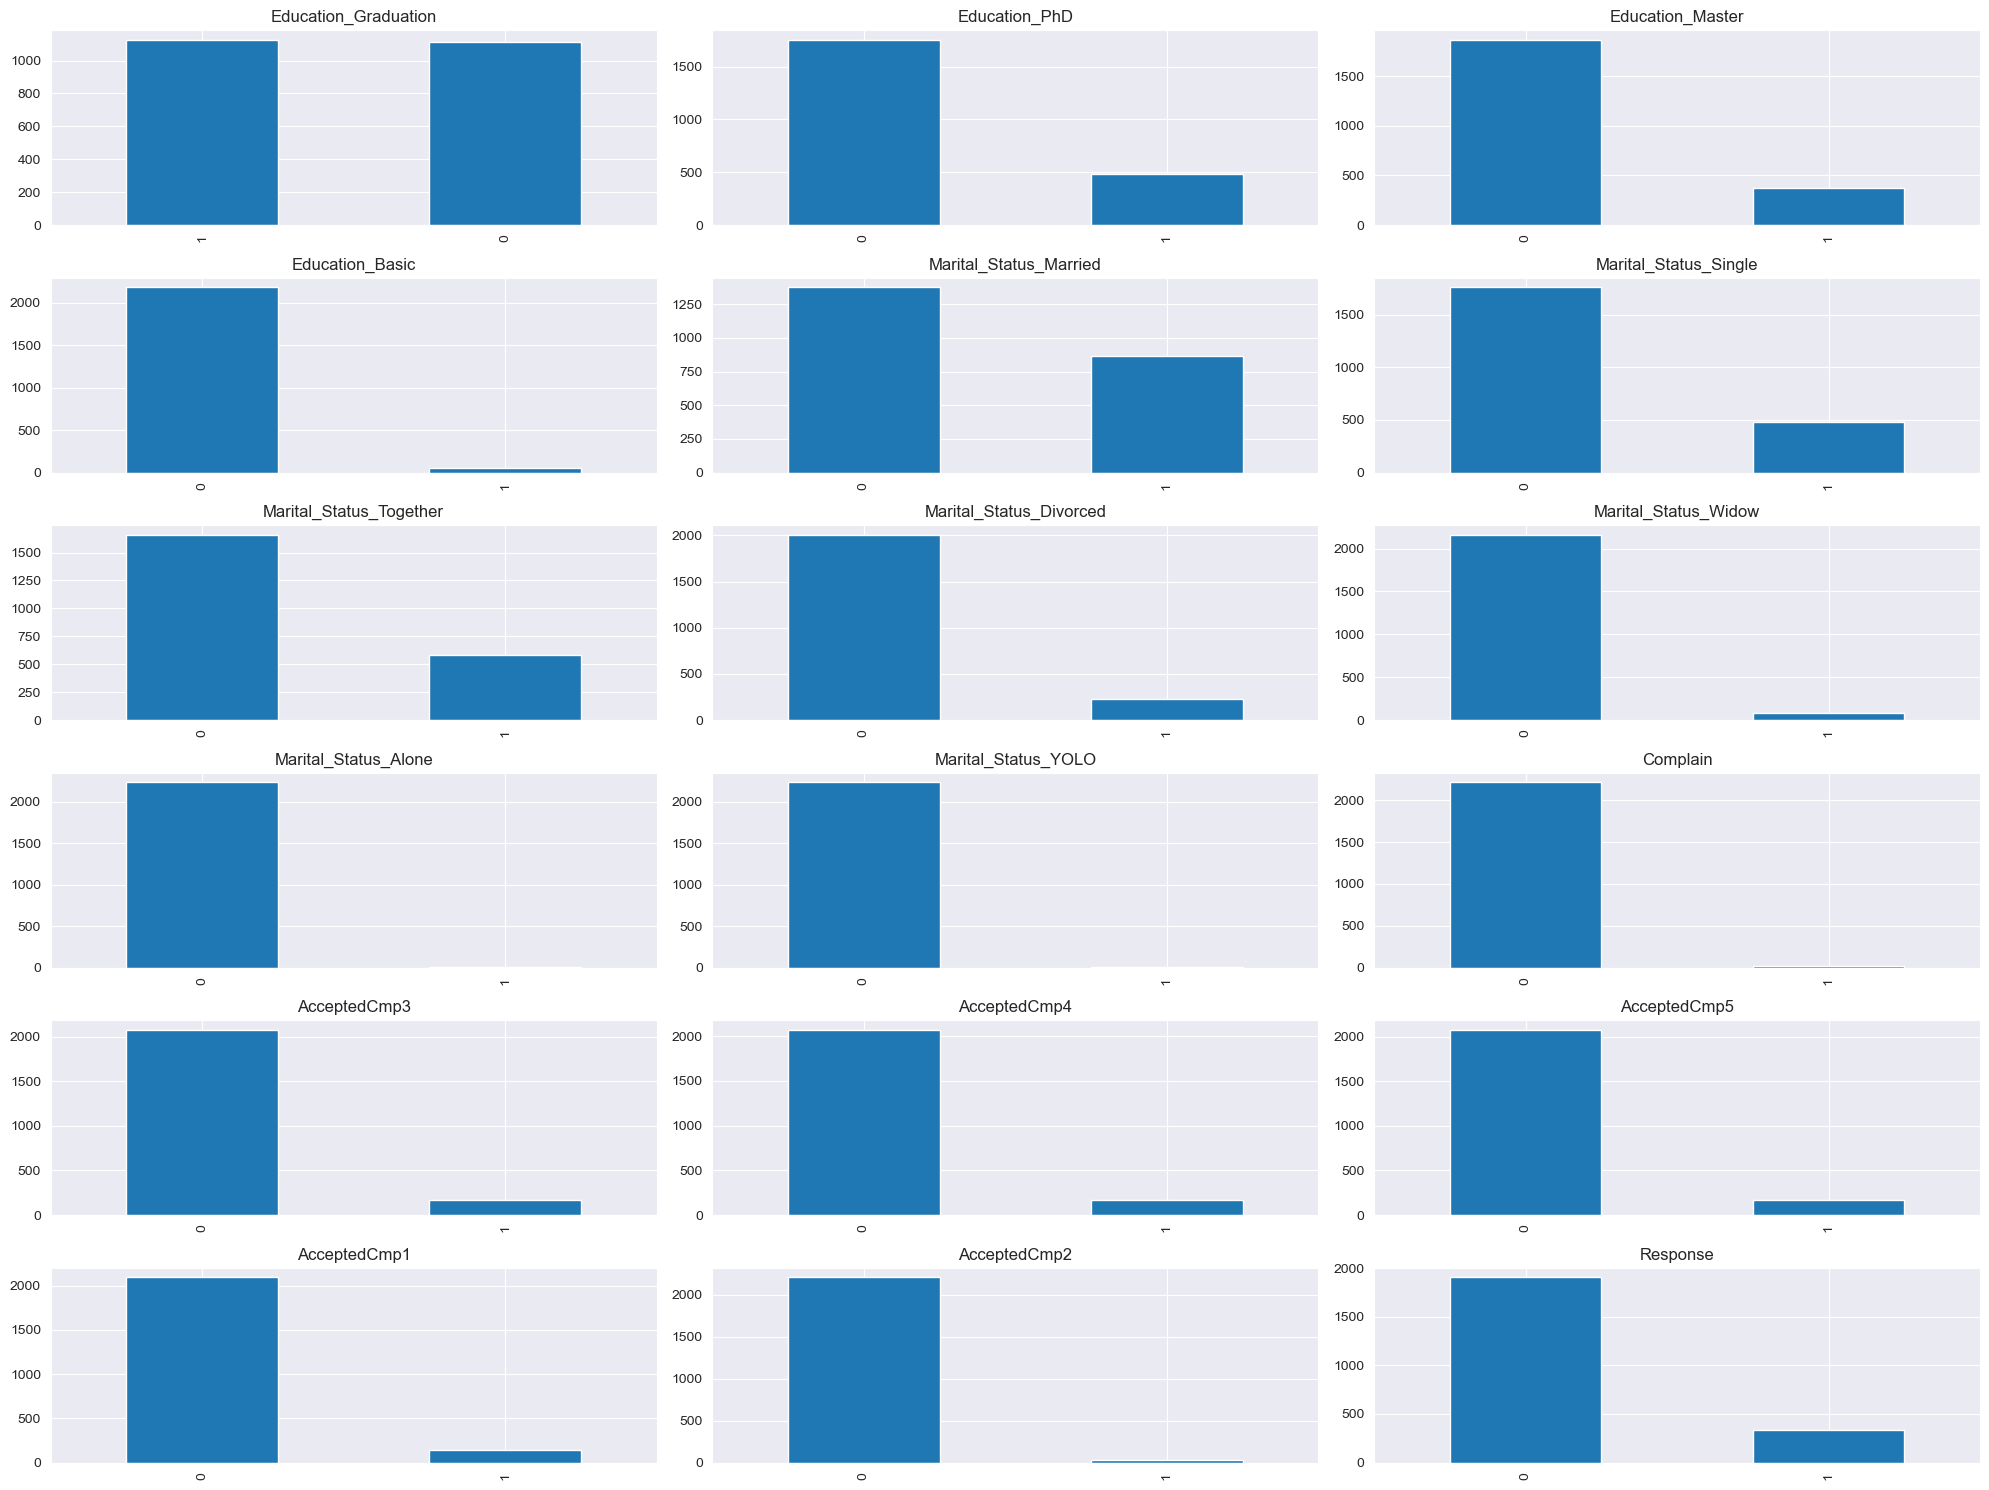

In [20]:
# Bar plots for categorical features
categorical_features = ['Education_Graduation', 'Education_PhD', 'Education_Master',
                        'Education_Basic', 'Marital_Status_Married',
                        'Marital_Status_Single', 'Marital_Status_Together',
                        'Marital_Status_Divorced', 'Marital_Status_Widow',
                        'Marital_Status_Alone', 'Marital_Status_YOLO', 
                        'Complain', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                        'AcceptedCmp1', 'AcceptedCmp2', 'Response']

# Calculate the number of rows and columns for the subplots
num_features = len(categorical_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(num_rows, num_cols, i+1)
    df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
plt.tight_layout()
plt.show()

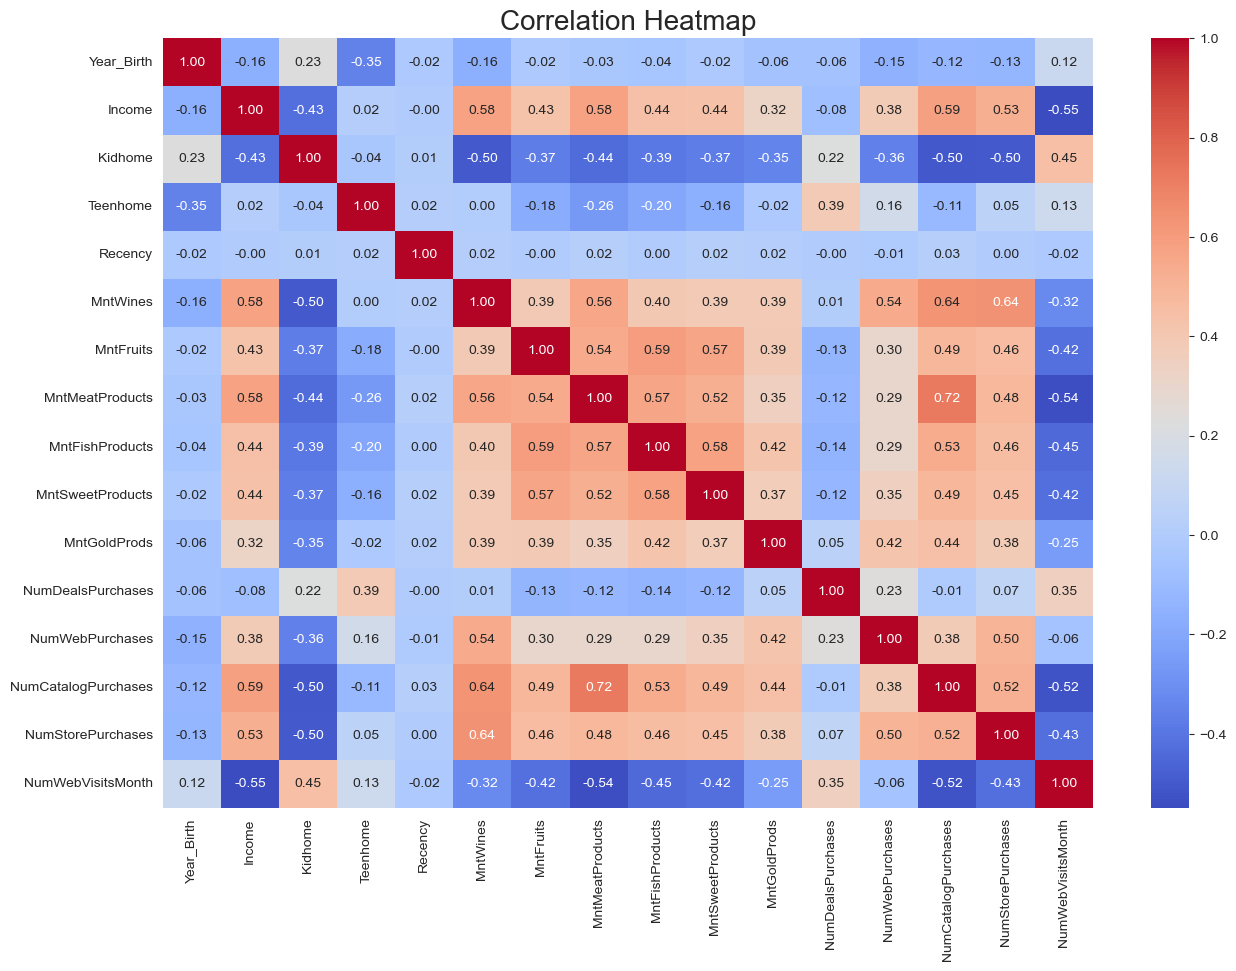

In [19]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

In [22]:
#Dimensionality Reduction with PCA

In [23]:
# Fit and transform the data using PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca_features = pca.fit_transform(scaled_df[numerical_features])

In [24]:
# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])

In [25]:
# Add the 'ID' and 'Dt_Customer' columns back to the PCA DataFrame
pca_df['ID'] = scaled_df['ID'].values
pca_df['Dt_Customer'] = scaled_df['Dt_Customer'].values

In [26]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,ID,Dt_Customer
0,3.821984,-0.042321,-1.208247,0.477612,-1.065246,0.310263,1.504525,-2.010755,-0.559117,1.145953,0.721796,0.760378,0.166001,5524,2012-09-04
1,-2.286765,0.217941,1.524686,-0.328833,-0.515843,1.023994,0.416482,-0.018892,0.516691,0.021735,0.134225,0.010652,-0.253550,2174,2014-03-08
2,1.893988,-0.207611,0.080174,-1.026984,-0.144306,-0.930054,-0.730762,-0.604711,0.343418,-1.047788,-0.327179,0.756111,1.126878,4141,2013-08-21
3,-2.461129,-1.381757,-0.832580,-0.744682,0.340547,0.039266,-0.232352,0.137057,-0.078851,-0.280961,-0.339121,-0.032295,0.086916,6182,2014-02-10
4,-0.277377,-0.269874,-1.500017,1.662769,0.590653,0.984739,-0.398705,-0.110791,0.142079,-0.404975,-0.217635,-0.181710,0.944000,5324,2014-01-19


In [28]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.37867197 0.12150841 0.07714972 0.06277265 0.05194788 0.04828886
 0.03974245 0.03813102 0.03130927 0.0285521  0.02660525 0.02438537
 0.02224494]


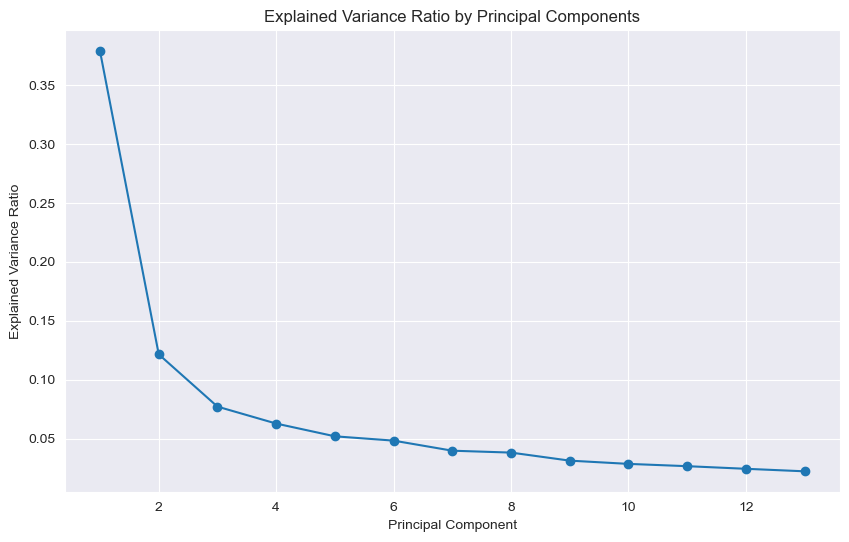

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()